# Projet 7 : Effectuez une prédiction de revenus

In [1]:
# import des librairies

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

## Mission 1 : Résumez les données utilisées

In [2]:
# chargement des données de distribution des revenus 

dist_rev = pd.read_csv('C:\\Users\\mfila\\data-projet7.csv')

In [3]:
dist_rev

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,"728,89795",7297
1,ALB,2008,2,100,"916,66235",7297
2,ALB,2008,3,100,"1010,916",7297
3,ALB,2008,4,100,"1086,9078",7297
4,ALB,2008,5,100,"1132,6997",7297
...,...,...,...,...,...,...
11594,COD,2008,96,100,"810,6233","303,19305"
11595,COD,2008,97,100,"911,7834","303,19305"
11596,COD,2008,98,100,"1057,8074","303,19305"
11597,COD,2008,99,100,"1286,6029","303,19305"


In [4]:
# verification des data types

dist_rev.dtypes

country         object
year_survey      int64
quantile         int64
nb_quantiles     int64
income          object
gdpppp          object
dtype: object

In [5]:
# changement du format des nombres pour deux colonnes: income et gdpppp

dist_rev['income'] = dist_rev['income'].str.replace(',','.')
dist_rev['gdpppp'] = dist_rev['gdpppp'].str.replace(',','.')

In [6]:
# changement de type de données pour deux colonnes   

dist_rev['income'] = dist_rev['income'].astype(float)
dist_rev['gdpppp'] = dist_rev['gdpppp'].astype(float)

In [7]:
dist_rev.describe()

,year_survey,quantile,nb_quantiles,income,gdpppp
count,11599.000000,11599.000000,11599.0,11599.000000,1.139900e+04
mean,2007.982757,50.500819,100.0,6069.224260,5.022128e+04
std,0.909633,28.868424,0.0,9414.185972,4.000688e+05
min,2004.000000,1.000000,100.0,16.719418,3.031931e+02
25%,2008.000000,25.500000,100.0,900.685515,2.576000e+03
50%,2008.000000,51.000000,100.0,2403.244900,7.560000e+03
75%,2008.000000,75.500000,100.0,7515.420900,1.877300e+04
max,2011.000000,100.000000,100.0,176928.550000,4.300332e+06


In [8]:
dist_rev.sort_values(by = ['income'])

,country,year_survey,quantile,nb_quantiles,income,gdpppp
1700,CHN,2007,1,100,16.719418,5712.00000
5700,KOR,2008,1,100,17.317732,19162.00000
1100,BOL,2008,1,100,20.584948,3950.00000
11499,COD,2008,1,100,29.364283,303.19305
6699,MDG,2010,1,100,29.411367,950.00000
...,...,...,...,...,...,...
3399,FRA,2008,100,100,122775.164000,30357.00000
1599,CAN,2008,100,100,133454.840000,35895.00000
3499,GBR,2008,100,100,141565.230000,34048.00000
4899,ISL,2008,100,100,160645.270000,36527.00000


In [9]:
dist_rev.sort_values(by = ['gdpppp'])

,country,year_survey,quantile,nb_quantiles,income,gdpppp
11598,COD,2008,100,100,2243.12260,303.19305
11525,COD,2008,27,100,119.30232,303.19305
11526,COD,2008,28,100,122.52806,303.19305
11527,COD,2008,29,100,125.39238,303.19305
11528,COD,2008,30,100,127.91960,303.19305
...,...,...,...,...,...,...
11294,PSE,2009,96,100,2763.88480,NaN
11295,PSE,2009,97,100,3077.83330,NaN
11296,PSE,2009,98,100,3449.22240,NaN
11297,PSE,2009,99,100,4165.99700,NaN


In [10]:
# Remplacement des données aberrantes pour Fidji

dist_rev.loc[dist_rev['country'] == 'FJI', 'gdpppp'] = 7777.6

In [11]:
# verification

dist_rev.sort_values(by = ['gdpppp'])

,country,year_survey,quantile,nb_quantiles,income,gdpppp
11598,COD,2008,100,100,2243.12260,303.19305
11525,COD,2008,27,100,119.30232,303.19305
11526,COD,2008,28,100,122.52806,303.19305
11527,COD,2008,29,100,125.39238,303.19305
11528,COD,2008,30,100,127.91960,303.19305
...,...,...,...,...,...,...
11294,PSE,2009,96,100,2763.88480,NaN
11295,PSE,2009,97,100,3077.83330,NaN
11296,PSE,2009,98,100,3449.22240,NaN
11297,PSE,2009,99,100,4165.99700,NaN


In [12]:
dist_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11599 entries, 0 to 11598
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       11599 non-null  object 
 1   year_survey   11599 non-null  int64  
 2   quantile      11599 non-null  int64  
 3   nb_quantiles  11599 non-null  int64  
 4   income        11599 non-null  float64
 5   gdpppp        11399 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 543.8+ KB


In [13]:
# Recherche des valeurs manquantes

nulls = dist_rev[dist_rev.isnull().any(axis=1)]

In [14]:
# lignes avec des valeurs manquantes

nulls

,country,year_survey,quantile,nb_quantiles,income,gdpppp
5800,XKX,2008,1,100,437.89370,NaN
5801,XKX,2008,2,100,508.17133,NaN
5802,XKX,2008,3,100,591.82820,NaN
5803,XKX,2008,4,100,668.00000,NaN
5804,XKX,2008,5,100,730.40220,NaN
...,...,...,...,...,...,...
11294,PSE,2009,96,100,2763.88480,NaN
11295,PSE,2009,97,100,3077.83330,NaN
11296,PSE,2009,98,100,3449.22240,NaN
11297,PSE,2009,99,100,4165.99700,NaN


In [15]:
# identification des code pays correspondant aux valeurs gdpppp manquantes

nulls.country.unique()

array(['XKX', 'PSE'], dtype=object)

In [16]:
# Rempacement des valeurs nulles pour les deux pays (source : site data.worldbank.org)

dist_rev.loc[dist_rev['country'] == 'XKX', 'gdpppp'] = 3254.9
dist_rev.loc[dist_rev['country'] == 'PSE', 'gdpppp'] = 2035

In [17]:
# vérification

dist_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11599 entries, 0 to 11598
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       11599 non-null  object 
 1   year_survey   11599 non-null  int64  
 2   quantile      11599 non-null  int64  
 3   nb_quantiles  11599 non-null  int64  
 4   income        11599 non-null  float64
 5   gdpppp        11599 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 543.8+ KB


In [18]:
# Vérification du nombre de quantiles par pays

nb_quantile = dist_rev[['country', 'quantile']].groupby('country').count()
nb_quantile[nb_quantile['quantile'] != 100]

,quantile
country,
LTU,99


In [19]:
for i in range(1,100):
    if i not in dist_rev.loc[dist_rev['country'] == 'LTU','quantile'].values:
        print(i)

41


In [20]:
# Nous allons utiliser les données des quantiles 40 et 42 pour calculer les valeurs manquantes

dist_rev.loc[(dist_rev['country'] == 'LTU') & (dist_rev['quantile'].isin([40,42]))]

,country,year_survey,quantile,nb_quantiles,income,gdpppp
6239,LTU,2008,40,100,4868.4507,17571.0
6240,LTU,2008,42,100,4895.8306,17571.0


In [21]:
# Ajout d'une ligne pour le quartile absent

dist_rev.loc['11599'] = ['LTU', 2008, 41, 100, ((4868.4507 + 4895.8306) / 2), 17571.0]
dist_rev

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.00000
1,ALB,2008,2,100,916.66235,7297.00000
2,ALB,2008,3,100,1010.91600,7297.00000
3,ALB,2008,4,100,1086.90780,7297.00000
4,ALB,2008,5,100,1132.69970,7297.00000
...,...,...,...,...,...,...
11595,COD,2008,97,100,911.78340,303.19305
11596,COD,2008,98,100,1057.80740,303.19305
11597,COD,2008,99,100,1286.60290,303.19305
11598,COD,2008,100,100,2243.12260,303.19305


In [22]:
# années des données utilisées

dist_rev['year_survey'].unique()

array([2008, 2009, 2010, 2007, 2006, 2011, 2004], dtype=int64)

In [23]:
# nombre de pays présents

dist_rev['country'].nunique()

116

In [24]:
# codes des pays

dist_rev['country'].unique()

array(['ALB', 'ARG', 'ARM', 'AUT', 'AZE', 'BEL', 'BFA', 'BGD', 'BGR',
       'BIH', 'BLR', 'BOL', 'BRA', 'BTN', 'CAF', 'CAN', 'CHL', 'CHN',
       'CIV', 'CMR', 'COL', 'CRI', 'CYP', 'CZE', 'DEU', 'DNK', 'DOM',
       'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'FJI', 'FRA', 'GBR', 'GEO',
       'GHA', 'GIN', 'GRC', 'GTM', 'HND', 'HRV', 'HUN', 'IDN', 'IND',
       'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JOR', 'JPN', 'KAZ',
       'KEN', 'KGZ', 'KHM', 'KOR', 'XKX', 'LAO', 'LBR', 'LKA', 'LTU',
       'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MKD', 'MLI', 'MNE',
       'MNG', 'MOZ', 'MRT', 'MWI', 'MYS', 'NER', 'NGA', 'NIC', 'NLD',
       'NOR', 'NPL', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY',
       'ROU', 'RUS', 'SDN', 'SLV', 'SRB', 'SVK', 'SVN', 'SWE', 'SWZ',
       'SYR', 'THA', 'TJK', 'TLS', 'TUR', 'TWN', 'TZA', 'UGA', 'UKR',
       'URY', 'USA', 'VEN', 'VNM', 'PSE', 'YEM', 'ZAF', 'COD'],
      dtype=object)

In [25]:
# chargement des données de la population par pays (source : data.worldbank.org)

population = pd.read_csv('C:\\Users\\mfila\\population_total_2020_en_csv.csv',skiprows=4)
population

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1775378.0,NaN
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,...,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0,NaN
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,...,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0,NaN
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,...,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0,NaN


In [26]:
# Choix des colonnes utiles (année 2008)

population = population[['Country Code', 'Country Name', '2008']]

In [27]:
dist_rev.rename(columns={'country': 'Country Code'}, inplace=True)

In [28]:
population

,Country Code,Country Name,2008
0,ABW,Aruba,101362.0
1,AFE,Africa Eastern and Southern,491173160.0
2,AFG,Afghanistan,27722281.0
3,AFW,Africa Western and Central,331772330.0
4,AGO,Angola,21695636.0
...,...,...,...
261,XKX,Kosovo,1747383.0
262,YEM,"Yemen, Rep.",21892149.0
263,ZAF,South Africa,49779472.0
264,ZMB,Zambia,12848531.0


In [29]:
# Ajout des informations sur la population des pays en 2008 au dataframe

data = pd.merge(dist_rev, population, how='left', on=['Country Code'])

In [30]:
# renommer la colonne 2008

data.rename(columns={'2008': 'Population_2008'}, inplace=True)

In [31]:
data

,Country Code,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Population_2008
0,ALB,2008,1,100,728.89795,7297.00000,Albania,2947314.0
1,ALB,2008,2,100,916.66235,7297.00000,Albania,2947314.0
2,ALB,2008,3,100,1010.91600,7297.00000,Albania,2947314.0
3,ALB,2008,4,100,1086.90780,7297.00000,Albania,2947314.0
4,ALB,2008,5,100,1132.69970,7297.00000,Albania,2947314.0
...,...,...,...,...,...,...,...,...
11595,COD,2008,97,100,911.78340,303.19305,"Congo, Dem. Rep.",60411195.0
11596,COD,2008,98,100,1057.80740,303.19305,"Congo, Dem. Rep.",60411195.0
11597,COD,2008,99,100,1286.60290,303.19305,"Congo, Dem. Rep.",60411195.0
11598,COD,2008,100,100,2243.12260,303.19305,"Congo, Dem. Rep.",60411195.0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11600 entries, 0 to 11599
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Code     11600 non-null  object 
 1   year_survey      11600 non-null  int64  
 2   quantile         11600 non-null  int64  
 3   nb_quantiles     11600 non-null  int64  
 4   income           11600 non-null  float64
 5   gdpppp           11600 non-null  float64
 6   Country Name     11500 non-null  object 
 7   Population_2008  11500 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 815.6+ KB


In [33]:
# recherche des valeurs manquantes

nulls = data[data.isnull().any(axis=1)]
nulls

,Country Code,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Population_2008
10399,TWN,2008,1,100,3477.1800,25342.0,NaN,NaN
10400,TWN,2008,2,100,4740.2637,25342.0,NaN,NaN
10401,TWN,2008,3,100,5331.3013,25342.0,NaN,NaN
10402,TWN,2008,4,100,5761.6577,25342.0,NaN,NaN
10403,TWN,2008,5,100,6093.2017,25342.0,NaN,NaN
...,...,...,...,...,...,...,...,...
10494,TWN,2008,96,100,38123.4600,25342.0,NaN,NaN
10495,TWN,2008,97,100,41663.7900,25342.0,NaN,NaN
10496,TWN,2008,98,100,46650.5820,25342.0,NaN,NaN
10497,TWN,2008,99,100,54016.9920,25342.0,NaN,NaN


In [34]:
# remplacement des valeurs manquantes

data.loc[data['Country Code'] == 'TWN', 'Country Name'] = 'Taiwan (Province of China)'

In [35]:
# remplacement des valeurs manquantes (source : countryeconomy.com)

data.loc[data['Country Code'] == 'TWN', 'Population_2008'] = 23037000

In [36]:
# verification des nulls

data.isnull().sum()


Country Code       0
year_survey        0
quantile           0
nb_quantiles       0
income             0
gdpppp             0
Country Name       0
Population_2008    0
dtype: int64

In [37]:
# calcul de la population couverte par l'analyse

proc_pop = data.Population_2008.drop_duplicates()

In [38]:
# nombre de personnes couvertes par l'analyse

proc_pop.sum()

6203861944.0

In [39]:
# 6757000000 population mondiale en 2008 (source : donnees.banquemondiale.org)

6203861944 / 6757000000

0.9181385147254699

In [40]:
# ce dataframe contient les informations sur les indices de gini des pays du monde entre 1960 et 2020

gini1 = pd.read_csv('C:\\Users\\mfila\\API_SI.POV.GINI_DS2_en_csv_v2_3840527.csv',skiprows=3)

In [41]:
gini1

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,51.3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,29.0,26.3,27.3,26.5,26.7,29.0,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,Zambia,ZMB,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,57.1,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
meta = pd.read_csv('C:\\Users\\mfila\\Metadata_Country_API_SI.POV.GINI_DS2_en_csv_v2_3840527.csv')

In [43]:
meta

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
...,...,...,...,...,...,...
260,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo,NaN
261,YEM,Middle East & North Africa,Low income,NaN,"Yemen, Rep.",NaN
262,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa,NaN
263,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia,NaN


In [44]:
meta2 = pd.read_csv('C:\\Users\\mfila\\Metadata_Indicator_API_SI.POV.GINI_DS2_en_csv_v2_3840527.csv')

In [45]:
meta2

,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION,Unnamed: 4
0,SI.POV.GINI,Gini index (World Bank estimate),Gini index measures the extent to which the di...,"World Bank, Development Research Group. Data a...",NaN


In [46]:
# chargement des données Les indices de Gini (l'année la plus recente pour chaque pays)

gini = pd.read_csv('C:\\Users\\mfila\\UNdata_Export_20220324_171249705.csv')

In [47]:
gini = gini.drop_duplicates(subset='Country or Area', keep='first')

In [48]:
gini

,Country or Area,Year,Value,Value Footnotes
0,Albania,2017,33.2,1.0
9,Algeria,2011,27.6,4.0
12,Angola,2018,51.3,7.0
15,Argentina,2019,42.9,9.0
46,Armenia,2019,29.9,12.0
...,...,...,...,...
1994,250,Based on data from LCMS-III. Estimated from un...,NaN,NaN
1995,251,Based on data from LCMS-II. Estimated from uni...,NaN,NaN
1996,252,Based on data from LCMS-I. Estimated from unit...,NaN,NaN
1997,253,Based on data from PICES. Estimated from unit-...,NaN,NaN


In [49]:
# nettoyage du dataframe

gini = gini.reset_index()

In [50]:
del gini['index']

In [51]:
gini

,Country or Area,Year,Value,Value Footnotes
0,Albania,2017,33.2,1.0
1,Algeria,2011,27.6,4.0
2,Angola,2018,51.3,7.0
3,Argentina,2019,42.9,9.0
4,Armenia,2019,29.9,12.0
...,...,...,...,...
417,250,Based on data from LCMS-III. Estimated from un...,NaN,NaN
418,251,Based on data from LCMS-II. Estimated from uni...,NaN,NaN
419,252,Based on data from LCMS-I. Estimated from unit...,NaN,NaN
420,253,Based on data from PICES. Estimated from unit-...,NaN,NaN


In [52]:
gini.loc[gini['Country or Area']=='Zimbabwe'].index.values

array([166], dtype=int64)

In [53]:
indexNames = gini[ (gini.index >= 167)].index


In [54]:
indexNames

Int64Index([167, 168, 169, 170, 171, 172, 173, 174, 175, 176,
            ...
            412, 413, 414, 415, 416, 417, 418, 419, 420, 421],
           dtype='int64', length=255)

In [55]:
gini=gini.drop(indexNames)

In [56]:
del gini['Value Footnotes']

In [57]:
gini

,Country or Area,Year,Value
0,Albania,2017,33.2
1,Algeria,2011,27.6
2,Angola,2018,51.3
3,Argentina,2019,42.9
4,Armenia,2019,29.9
...,...,...,...
162,Vietnam,2018,35.7
163,West Bank and Gaza,2016,33.7
164,Yemen,2014,36.7
165,Zambia,2015,57.1


In [58]:
data

,Country Code,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Population_2008
0,ALB,2008,1,100,728.89795,7297.00000,Albania,2947314.0
1,ALB,2008,2,100,916.66235,7297.00000,Albania,2947314.0
2,ALB,2008,3,100,1010.91600,7297.00000,Albania,2947314.0
3,ALB,2008,4,100,1086.90780,7297.00000,Albania,2947314.0
4,ALB,2008,5,100,1132.69970,7297.00000,Albania,2947314.0
...,...,...,...,...,...,...,...,...
11595,COD,2008,97,100,911.78340,303.19305,"Congo, Dem. Rep.",60411195.0
11596,COD,2008,98,100,1057.80740,303.19305,"Congo, Dem. Rep.",60411195.0
11597,COD,2008,99,100,1286.60290,303.19305,"Congo, Dem. Rep.",60411195.0
11598,COD,2008,100,100,2243.12260,303.19305,"Congo, Dem. Rep.",60411195.0


## Mission 2

###  2.1. Montrez la diversité des pays en termes de distribution de revenus à l'aide d'un graphique

In [59]:
# Revenu moyen par pays (valiable income)

rev_m = data.groupby(by='Country Name').mean()
rev_m.reset_index(inplace=True)
rev_m.sort_values('income')

,Country Name,year_survey,quantile,nb_quantiles,income,gdpppp,Population_2008
21,"Congo, Dem. Rep.",2008.0,50.5,100.0,276.016044,303.19305,60411195.0
65,Madagascar,2010.0,50.5,100.0,345.237074,950.00000,19996476.0
23,Cote d'Ivoire,2008.0,50.5,100.0,399.835204,1526.00000,19605568.0
56,Kenya,2007.0,50.5,100.0,519.320032,1429.00000,39791984.0
33,Eswatini,2009.0,50.5,100.0,530.283828,4748.00000,1049948.0
...,...,...,...,...,...,...,...
82,Norway,2008.0,50.5,100.0,22483.375020,49070.00000,4768212.0
16,Canada,2008.0,50.5,100.0,23739.640518,35895.00000,33247118.0
64,Luxembourg,2008.0,50.5,100.0,25217.562681,73127.00000,488650.0
110,United States,2008.0,50.5,100.0,25503.581661,43261.00000,304093966.0


In [60]:
X = rev_m[['income']].values

In [61]:
# importation des librairies

from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  
from sklearn import preprocessing
from sklearn.metrics import pairwise_distances_argmin_min

In [62]:
# k-means

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

C:\Users\mfila\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mfila\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [63]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

1 : 5102.9615404707665
2 : 2174.9463281905287
3 : 1455.773470216779
4 : 1084.8028915932427
5 : 898.1299708899267
6 : 635.9447147702911
7 : 588.971303634372
8 : 486.3067151065287
9 : 479.71913013535914


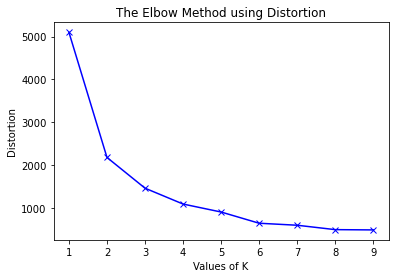

In [64]:
# choisir le nombre de clusters

plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [65]:
nb_cluster = 5
X = data.gdpppp.values.reshape(-1, 1)
X = data[['gdpppp']].values.reshape(-1, 1)

# Normalisation des données
X_scaled = preprocessing.scale(X)

# Clustering avec la méthode des kmeans
km = KMeans(n_clusters = nb_cluster).fit(X)

# Determiner les pays qui sont les plus proches des centroïdes des clusters
i_pays_plus_proches, _ = pairwise_distances_argmin_min(km.cluster_centers_, X)
pays_representatifs_cluster = data.iloc[i_pays_plus_proches].sort_values('gdpppp', ascending=False)
pays_representatifs_cluster

,Country Code,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Population_2008
6299,LUX,2008,1,100,5780.83740,73127.0,Luxembourg,488650.0
300,AUT,2008,1,100,2958.07640,36193.0,Austria,8321496.0
2300,CZE,2008,1,100,1586.24710,23223.0,Czech Republic,10384603.0
7099,MNE,2008,1,100,1344.21950,10556.0,Montenegro,616969.0
11099,VNM,2006,1,100,234.26695,2578.0,Vietnam,86243424.0


In [66]:
# liste de 5 pays representatifs de leur cluster de revenu moyen

liste_pays = pays_representatifs_cluster['Country Name']

In [67]:
liste_pays

6299         Luxembourg
300             Austria
2300     Czech Republic
7099         Montenegro
11099           Vietnam
Name: Country Name, dtype: object

In [68]:
df_income = data.copy()

In [69]:
df_income = df_income[['Country Name','quantile','income']]
df_income

,Country Name,quantile,income
0,Albania,1,728.89795
1,Albania,2,916.66235
2,Albania,3,1010.91600
3,Albania,4,1086.90780
4,Albania,5,1132.69970
...,...,...,...
11595,"Congo, Dem. Rep.",97,911.78340
11596,"Congo, Dem. Rep.",98,1057.80740
11597,"Congo, Dem. Rep.",99,1286.60290
11598,"Congo, Dem. Rep.",100,2243.12260


In [70]:
df_income_log = df_income.loc[(df_income['Country Name'].isin(liste_pays))]

In [71]:
# dataframe des revenus moyen des pays choisis

df_income_log

,Country Name,quantile,income
300,Austria,1,2958.0764
301,Austria,2,4893.4673
302,Austria,3,5459.6490
303,Austria,4,5923.5854
304,Austria,5,6380.2780
...,...,...,...
11194,Vietnam,96,3521.1406
11195,Vietnam,97,3879.6320
11196,Vietnam,98,4378.4014
11197,Vietnam,99,5319.5645


In [72]:
import seaborn as sns

In [73]:
liste_pays=pd.DataFrame(liste_pays)


In [74]:
liste_pays

,Country Name
6299,Luxembourg
300,Austria
2300,Czech Republic
7099,Montenegro
11099,Vietnam


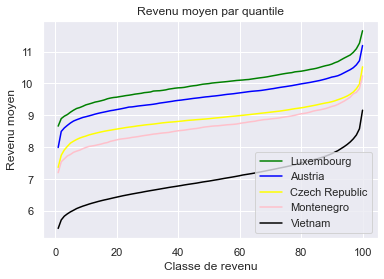

In [75]:
# graphique représentant le revenu moyen (axe des ordonnées, sur une échelle logarithmique) de chacune des classes 
# de revenus (axe des abscisses) pour 5 pays

sns.set(style="darkgrid")
couleur=['green','blue','yellow','pink','black']
liste_pays=['Luxembourg','Austria','Czech Republic','Montenegro','Vietnam']
for i in range(len(liste_pays)):
    df=df_income_log.loc[(df_income_log['Country Name']==liste_pays[i]),:]
    plt.plot(df['quantile'],np.log(df['income']),
             label=liste_pays[i],color=couleur[i])
plt.xlabel('Classe de revenu')
plt.ylabel('Revenu moyen')    
plt.title('Revenu moyen par quantile')
plt.legend()
plt.show()

In [76]:
rev_m_bar = rev_m.loc[rev_m['Country Name'].isin(liste_pays)]

In [77]:
rev_m_bar = rev_m_bar.sort_values(by='income')

Text(0.5, 0, 'Revenus moyens')

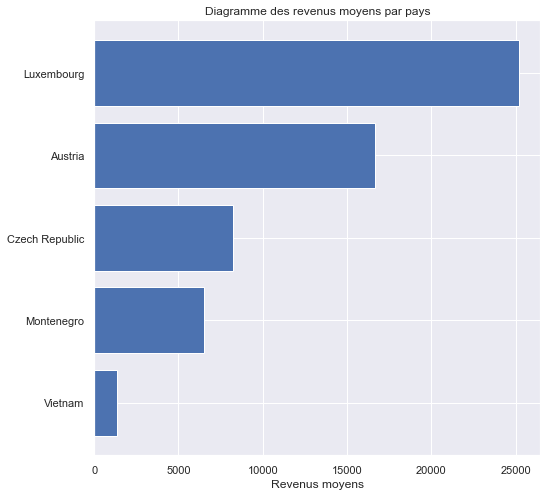

In [78]:
# diagramme en batôn des revenus moyens par pays

plt.figure(figsize=(8,8))
plt.barh(rev_m_bar['Country Name'], rev_m_bar.income)
plt.title('Diagramme des revenus moyens par pays')
plt.xlabel('Revenus moyens')

### 2.2. Représentez la courbe de Lorenz de chacun des pays choisis.

In [79]:
rev_lux = df_income_log[df_income_log['Country Name'] == 'Luxembourg']
rev_aus = df_income_log[df_income_log['Country Name'] == 'Austria']
rev_czh = df_income_log[df_income_log['Country Name'] == 'Czech Republic']
rev_mont = df_income_log[df_income_log['Country Name'] == 'Montenegro']
rev_viet = df_income_log[df_income_log['Country Name'] == 'Vietnam']

In [80]:
rev_lux = rev_lux['income'].values
lorenz_lux = np.cumsum(np.sort(rev_lux)) / rev_lux.sum()
lorenz_lux = np.append([0], lorenz_lux)

rev_aus = rev_aus['income'].values
lorenz_aus = np.cumsum(np.sort(rev_aus)) / rev_aus.sum()
lorenz_aus = np.append([0], lorenz_aus)

rev_czh = rev_czh['income'].values
lorenz_czh = np.cumsum(np.sort(rev_czh)) / rev_czh.sum()
lorenz_czh = np.append([0], lorenz_czh)

rev_mont = rev_mont['income'].values
lorenz_mont = np.cumsum(np.sort(rev_mont)) / rev_mont.sum()
lorenz_mont = np.append([0], lorenz_mont)

rev_viet = rev_viet['income'].values
lorenz_viet = np.cumsum(np.sort(rev_viet)) / rev_viet.sum()
lorenz_viet = np.append([0], lorenz_viet)

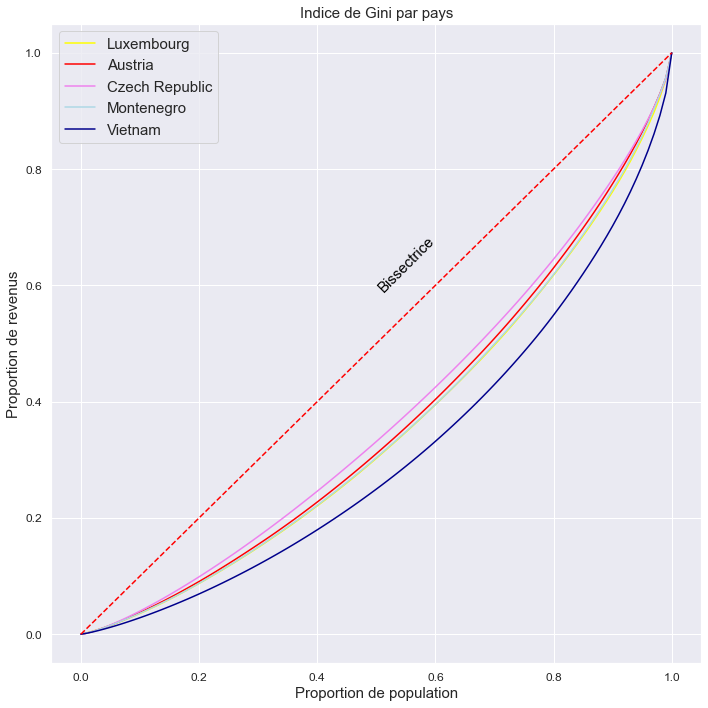

In [81]:
# Paramètres

plt.figure(figsize=(10,10))

# Paramètres des courbes de Lorenz

plt.plot(np.linspace(0,1,len(lorenz_lux)),lorenz_lux, color='yellow')
plt.plot(np.linspace(0,1,len(lorenz_aus)),lorenz_aus, color='red')
plt.plot(np.linspace(0,1,len(lorenz_czh)),lorenz_czh, color='violet')
plt.plot(np.linspace(0,1,len(lorenz_mont)),lorenz_mont, color='lightblue')
plt.plot(np.linspace(0,1,len(lorenz_viet)),lorenz_viet, color='darkblue')

# Paramètre de la médiatrice

x = [0, 1]
y = [0, 1]
plt.plot(x, y, 'red', linestyle='--', label='Bissectrice')
plt.text(0.5, 0.59, 'Bissectrice', fontsize=15, rotation = 45, color ='black')

# Métadonnées
plt.title('Indice de Gini par pays', fontsize=15)
plt.ylabel('Proportion de revenus', fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('Proportion de population', fontsize=15)
plt.xticks(fontsize=12)
label = ['Luxembourg',  'Austria', 'Czech Republic', 'Montenegro', 'Vietnam']
plt.legend(label, prop={'size':15})
plt.tight_layout()


plt.show()

### 2.3. Pour chacun de pays choisis, représentez l'évolution de l'indice de Gini au fil des ans.

In [82]:
# index de gini par pays et par année

gini1.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,51.3,NaN,NaN,NaN


In [83]:
# Sélection des pays

In [84]:
gini_evol = gini1.set_index('Country Name')

In [85]:
gini_evol = gini_evol.loc(axis=0)['Luxembourg','Austria','Czech Republic','Montenegro','Vietnam']

In [86]:
gini_evol

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
Country Name,,,,,,,,,,,,,,,,,,,,,
Luxembourg,LUX,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.3,32.0,31.2,32.9,31.7,34.5,35.4,NaN,NaN,NaN
Austria,AUT,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.5,30.8,30.5,30.5,30.8,29.7,30.8,NaN,NaN,NaN
Czech Republic,CZE,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.1,26.5,25.9,25.9,25.4,24.9,25.0,NaN,NaN,NaN
Montenegro,MNE,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41.2,39.0,38.8,39.0,38.5,NaN,NaN,NaN,NaN,NaN
Vietnam,VNM,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.6,NaN,34.8,NaN,35.3,NaN,35.7,NaN,NaN,NaN


In [87]:
# Sélection des indices de Gini pour les années differentes

gini_evol = gini_evol[['2004', '2006', '2008', '2010', '2012','2014','2015','2016','2017','2018']]
gini_evol

,2004,2006,2008,2010,2012,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,
Luxembourg,30.2,30.9,32.6,30.5,34.3,31.2,32.9,31.7,34.5,35.4
Austria,29.8,29.6,30.4,30.3,30.5,30.5,30.5,30.8,29.7,30.8
Czech Republic,27.5,26.7,26.3,26.6,26.1,25.9,25.9,25.4,24.9,25.0
Montenegro,NaN,NaN,NaN,NaN,41.2,38.8,39.0,38.5,NaN,NaN
Vietnam,36.8,35.8,35.6,39.3,35.6,34.8,NaN,35.3,NaN,35.7


In [88]:
# ajout des données, source : countryeconomy.com

gini_evol.loc['Montenegro','2018']=34.7
gini_evol.loc['Montenegro','2017']=36.7

C:\Users\mfila\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\mfila\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


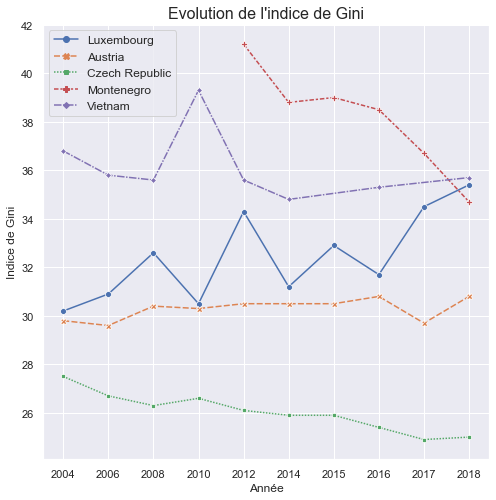

In [89]:
# Graphique des indices de Gini pour nos différents pays

# préparation du dataframe

gini_T = gini_evol.T

# graphique

plt.figure(figsize=(8,8))
sns.lineplot(data=gini_T, markers=True)

plt.title("Evolution de l'indice de Gini", size=16)
plt.xlabel('Année', size=12)
plt.ylabel('Indice de Gini', size=12)
plt.legend(loc='upper left', prop={"size":12})

### 2.4. Classez les pays par indice de Gini. Donnez la moyenne, les 5 pays ayant l'indice de Gini le plus élevé et les 5 pays ayant l'indice de Gini le plus faible. En quelle position se trouve la France ?

In [90]:
gini_2018 = gini1[['Country Name', '2008']]

In [91]:
gini_2018

,Country Name,2008
0,Aruba,NaN
1,Africa Eastern and Southern,NaN
2,Afghanistan,NaN
3,Africa Western and Central,NaN
4,Angola,42.7
...,...,...
261,Kosovo,NaN
262,"Yemen, Rep.",NaN
263,South Africa,63.0
264,Zambia,NaN


In [92]:
gini_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   2008          73 non-null     float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB


In [93]:
gini_calcul = data.copy()

In [94]:
# Liste des pays
pays = gini_calcul['Country Name'].drop_duplicates().values

# Création colonne pour index de Gini calculé

gini_calcul['Gini_calc'] = 0

# Calcul de l'indice de Gini pour chaque pays

for i in pays:
    income1 = gini_calcul.loc[gini_calcul['Country Name'] == i].income.values
    lorenz = np.cumsum(np.sort(income1)) / income1.sum()
    lorenz = np.append([0], lorenz)
    gini_calcul.loc[gini_calcul['Country Name'] == i, 'Gini_calc'] = 2 * (0.5 - (lorenz[:-1].sum() / len(lorenz)))

gini_calcul

,Country Code,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Population_2008,Gini_calc
0,ALB,2008,1,100,728.89795,7297.00000,Albania,2947314.0,0.321410
1,ALB,2008,2,100,916.66235,7297.00000,Albania,2947314.0,0.321410
2,ALB,2008,3,100,1010.91600,7297.00000,Albania,2947314.0,0.321410
3,ALB,2008,4,100,1086.90780,7297.00000,Albania,2947314.0,0.321410
4,ALB,2008,5,100,1132.69970,7297.00000,Albania,2947314.0,0.321410
...,...,...,...,...,...,...,...,...,...
11595,COD,2008,97,100,911.78340,303.19305,"Congo, Dem. Rep.",60411195.0,0.459403
11596,COD,2008,98,100,1057.80740,303.19305,"Congo, Dem. Rep.",60411195.0,0.459403
11597,COD,2008,99,100,1286.60290,303.19305,"Congo, Dem. Rep.",60411195.0,0.459403
11598,COD,2008,100,100,2243.12260,303.19305,"Congo, Dem. Rep.",60411195.0,0.459403


In [95]:
gini_df = gini_calcul[['Country Name','Country Code','Gini_calc']]

In [96]:
gini_df = gini_df.drop_duplicates()

In [97]:
# dataframe gini_df contient des informations sur les index de gini en 2008 pour 116 pays

gini_df['Gini_calc']=gini_df['Gini_calc']*100

In [98]:
gini_df.mean()

Gini_calc    39.501693
dtype: float64

In [99]:
#

gini_df.sort_values(by = 'Gini_calc')

,Country Name,Country Code,Gini_calc
9599,Slovenia,SVN,24.824876
9499,Slovak Republic,SVK,26.457318
2300,Czech Republic,CZE,27.016228
9699,Sweden,SWE,27.216580
10699,Ukraine,UKR,27.241550
...,...,...,...
1400,Central African Republic,CAF,57.597241
3900,Guatemala,GTM,58.246806
2000,Colombia,COL,58.343686
4000,Honduras,HND,61.551164


In [100]:
gini_df = gini_df.sort_values(by = 'Gini_calc',ascending=False)

In [101]:

gini_df = gini_df.reset_index()

In [102]:
del gini_df['index']

In [103]:
gini_df

,Country Name,Country Code,Gini_calc
0,South Africa,ZAF,68.294901
1,Honduras,HND,61.551164
2,Colombia,COL,58.343686
3,Guatemala,GTM,58.246806
4,Central African Republic,CAF,57.597241
...,...,...,...
111,Ukraine,UKR,27.241550
112,Sweden,SWE,27.216580
113,Czech Republic,CZE,27.016228
114,Slovak Republic,SVK,26.457318


In [104]:
index_france = gini_df[gini_df['Country Name']=='France']

In [105]:
gini_df.loc[gini_df['Country Name'] == 'France']

,Country Name,Country Code,Gini_calc
76,France,FRA,34.563984


## Mission 3 : créer la classe de revenu des parents

### 3.1. Calcul des coéfficients d'élasticité

In [106]:
gdim = pd.read_csv('C:\\Users\\mfila\\gdim_bank_mondial.csv')
gdim

,countryname,wbcode,iso3,region,incgroup2,incgroup4,fragile,survey,year,status,...,Cores2125_MAcatC1,Shortfall0611_obs,Shortfall0611_IGP,Shortfall1217_obs,Shortfall1217_IGP,IGEincome,S1,S2,S3,MLD_psu
0,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,25103.0,0.086197,18054.0,0.345224,NaN,NaN,NaN,NaN,0.10
1,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,12107.0,0.083271,8538.0,0.389952,NaN,NaN,NaN,NaN,0.10
2,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,12996.0,0.089161,9516.0,0.307687,NaN,NaN,NaN,NaN,0.10
3,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,25396.0,0.050447,18387.0,0.218062,NaN,NaN,NaN,NaN,0.10
4,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,12246.0,0.047961,8677.0,0.230909,NaN,NaN,NaN,NaN,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6499,Zambia,ZMB,ZMB,Sub-Saharan Africa,Developing economies,Lower middle income,0,LCMS-VI,1980,Co-residents only,...,NaN,1830.0,0.023843,980.0,0.069934,NaN,NaN,NaN,NaN,0.16
6500,Zambia,ZMB,ZMB,Sub-Saharan Africa,Developing economies,Lower middle income,0,LCMS-VI,1980,Co-residents only,...,NaN,1948.0,0.010193,912.0,0.098336,NaN,NaN,NaN,NaN,0.16
6501,Zambia,ZMB,ZMB,Sub-Saharan Africa,Developing economies,Lower middle income,0,LCMS-VI,1980,Co-residents only,...,NaN,4375.0,0.016527,2269.0,0.072795,NaN,NaN,NaN,NaN,0.16
6502,Zambia,ZMB,ZMB,Sub-Saharan Africa,Developing economies,Lower middle income,0,LCMS-VI,1980,Co-residents only,...,NaN,2109.0,0.011469,1183.0,0.088865,NaN,NaN,NaN,NaN,0.16


In [107]:
# Nettoyage du df

gdim = gdim[['countryname', 'iso3', 'region', 'incgroup4', 'year', 'IGEincome']]

In [108]:
# zoom sur les données absentes

null_gdim = gdim.loc[gdim['IGEincome'].isnull()]
null_gdim

,countryname,iso3,region,incgroup4,year,IGEincome
0,Afghanistan,AFG,South Asia,Low income,1980,NaN
1,Afghanistan,AFG,South Asia,Low income,1980,NaN
2,Afghanistan,AFG,South Asia,Low income,1980,NaN
3,Afghanistan,AFG,South Asia,Low income,1980,NaN
4,Afghanistan,AFG,South Asia,Low income,1980,NaN
...,...,...,...,...,...,...
6499,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,1980,NaN
6500,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,1980,NaN
6501,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,1980,NaN
6502,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,1980,NaN


In [109]:
# supprimer les NaN de la colonne IGEincome

gdim = gdim.dropna(subset=['IGEincome'])
gdim

,countryname,iso3,region,incgroup4,year,IGEincome
60,Albania,ALB,Europe & Central Asia,Upper middle income,1970,0.815874
61,Albania,ALB,Europe & Central Asia,Upper middle income,1970,0.815874
62,Albania,ALB,Europe & Central Asia,Upper middle income,1970,0.815874
63,Albania,ALB,Europe & Central Asia,Upper middle income,1970,0.815874
64,Albania,ALB,Europe & Central Asia,Upper middle income,1970,0.815874
...,...,...,...,...,...,...
6481,"Congo, Dem. Rep.",COD,Sub-Saharan Africa,Low income,1970,0.707703
6482,"Congo, Dem. Rep.",COD,Sub-Saharan Africa,Low income,1970,0.707703
6483,"Congo, Dem. Rep.",COD,Sub-Saharan Africa,Low income,1970,0.707703
6484,"Congo, Dem. Rep.",COD,Sub-Saharan Africa,Low income,1970,0.707703


In [110]:
# coefficient d'élasticité moyen par région du monde

mean_gdim_reg = gdim.groupby(['region']).mean()
mean_gdim_reg

,year,IGEincome
region,,
East Asia & Pacific,1964.000000,0.504399
Europe & Central Asia,1968.888889,0.465537
High income,1961.611111,0.348050
Latin America & Caribbean,1967.142857,0.896534
Middle East & North Africa,1970.000000,0.816695
South Asia,1960.000000,0.495351
Sub-Saharan Africa,1970.000000,0.655524


In [111]:
# affectation du coefficient moyen par région aux pays sans coéfficient

new = pd.merge(null_gdim, mean_gdim_reg, how='left', on='region')
new

,countryname,iso3,region,incgroup4,year_x,IGEincome_x,year_y,IGEincome_y
0,Afghanistan,AFG,South Asia,Low income,1980,NaN,1960.0,0.495351
1,Afghanistan,AFG,South Asia,Low income,1980,NaN,1960.0,0.495351
2,Afghanistan,AFG,South Asia,Low income,1980,NaN,1960.0,0.495351
3,Afghanistan,AFG,South Asia,Low income,1980,NaN,1960.0,0.495351
4,Afghanistan,AFG,South Asia,Low income,1980,NaN,1960.0,0.495351
...,...,...,...,...,...,...,...,...
5646,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,1980,NaN,1970.0,0.655524
5647,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,1980,NaN,1970.0,0.655524
5648,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,1980,NaN,1970.0,0.655524
5649,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,1980,NaN,1970.0,0.655524


In [112]:
# nettoyage du df

new = new[['countryname','iso3','IGEincome_y']]
new = new.rename(columns={'countryname': 'Country Name'})
new = new.rename(columns={'IGEincome_y': 'IGEincome'})
new

,Country Name,iso3,IGEincome
0,Afghanistan,AFG,0.495351
1,Afghanistan,AFG,0.495351
2,Afghanistan,AFG,0.495351
3,Afghanistan,AFG,0.495351
4,Afghanistan,AFG,0.495351
...,...,...,...
5646,Zambia,ZMB,0.655524
5647,Zambia,ZMB,0.655524
5648,Zambia,ZMB,0.655524
5649,Zambia,ZMB,0.655524


In [113]:
# dans le dataframe test nous avons les coéfficients présents dans le dataframe de source

test = gdim.groupby(['countryname']).mean()
test

,year,IGEincome
countryname,,
Albania,1970,0.815874
Australia,1960,0.275000
Austria,1960,0.245267
Bangladesh,1960,0.538000
Belarus,1970,0.342738
...,...,...
Uganda,1970,1.029195
United Kingdom,1960,0.480978
United States,1960,0.537666


In [114]:
# nettoyage du dataframe 

test['Country Name'] = test.index
test = test.reset_index()
del test['countryname']
del test['year']
test

,IGEincome,Country Name
0,0.815874,Albania
1,0.275000,Australia
2,0.245267,Austria
3,0.538000,Bangladesh
4,0.342738,Belarus
...,...,...
70,1.029195,Uganda
71,0.480978,United Kingdom
72,0.537666,United States
73,0.496764,Uzbekistan


In [115]:
# regrouper les informations sur les coéfficients des pays du monde dans un seul dataframe new1

new1 = pd.merge(new, test, how='outer')
new1

,Country Name,iso3,IGEincome
0,Afghanistan,AFG,0.495351
1,Afghanistan,AFG,0.495351
2,Afghanistan,AFG,0.495351
3,Afghanistan,AFG,0.495351
4,Afghanistan,AFG,0.495351
...,...,...,...
5721,Uganda,NaN,1.029195
5722,United Kingdom,NaN,0.480978
5723,United States,NaN,0.537666
5724,Uzbekistan,NaN,0.496764


In [116]:
new2 = new1.drop_duplicates(subset=['Country Name'])
new2

,Country Name,iso3,IGEincome
0,Afghanistan,AFG,0.495351
12,Angola,AGO,0.655524
24,Albania,ALB,0.465537
72,Argentina,ARG,0.896534
87,Armenia,ARM,0.465537
...,...,...,...
5567,South Africa,ZAF,0.655524
5615,"Congo, Dem. Rep.",COD,0.655524
5639,Zambia,ZMB,0.655524
5690,Luxembourg,NaN,0.380792


In [117]:
new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 5710
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  150 non-null    object 
 1   iso3          148 non-null    object 
 2   IGEincome     150 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.7+ KB


In [118]:
# aujouter les informations sur les coéfficients d'élasticité au dataframe avec les index de Gini
test4 = pd.merge(gini_df, new2, how='left', on='Country Name' )
test4

,Country Name,Country Code,Gini_calc,iso3,IGEincome
0,South Africa,ZAF,68.294901,ZAF,0.655524
1,Honduras,HND,61.551164,HND,0.896534
2,Colombia,COL,58.343686,COL,0.896534
3,Guatemala,GTM,58.246806,GTM,0.896534
4,Central African Republic,CAF,57.597241,CAF,0.655524
...,...,...,...,...,...
111,Ukraine,UKR,27.241550,UKR,0.465537
112,Sweden,SWE,27.216580,SWE,0.348050
113,Czech Republic,CZE,27.016228,CZE,0.348050
114,Slovak Republic,SVK,26.457318,SVK,0.348050


In [119]:
del test4['iso3']

In [120]:
# zoom sur les valeurs absentes
test4.loc[test4['IGEincome'].isnull()]

,Country Name,Country Code,Gini_calc,IGEincome
21,Eswatini,SWZ,47.873465,NaN
44,North Macedonia,MKD,41.093123,NaN
60,Syrian Arab Republic,SYR,37.387332,NaN
82,Taiwan (Province of China),TWN,33.148652,NaN


In [121]:
test4.loc[test4['Country Name']=='China','IGEincome']

16    0.504399
Name: IGEincome, dtype: float64

In [122]:
# affectation des valeurs absentes
test4.loc[test4['Country Name']=='Eswatini','IGEincome']=0.661654
test4.loc[test4['Country Name']=='North Macedonia','IGEincome']=0.424817
test4.loc[test4['Country Name']=='Syrian Arab Republic','IGEincome']=0.916461
test4.loc[test4['Country Name']=='Taiwan (Province of China)','IGEincome']=0.504399

In [123]:
# dans le dataframe test4 nous avons les informations sur les index de Gini et coéfficients d'élasticité de 116 pays
test4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 115
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  116 non-null    object 
 1   Country Code  116 non-null    object 
 2   Gini_calc     116 non-null    float64
 3   IGEincome     116 non-null    float64
dtypes: float64(2), object(2)
memory usage: 4.5+ KB


In [124]:
# regroupement de touts les variables dans un seul dataframe
fin = pd.merge(data,test4,how='left',on=['Country Code','Country Name'])

In [125]:
fin

,Country Code,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Population_2008,Gini_calc,IGEincome
0,ALB,2008,1,100,728.89795,7297.00000,Albania,2947314.0,32.141019,0.465537
1,ALB,2008,2,100,916.66235,7297.00000,Albania,2947314.0,32.141019,0.465537
2,ALB,2008,3,100,1010.91600,7297.00000,Albania,2947314.0,32.141019,0.465537
3,ALB,2008,4,100,1086.90780,7297.00000,Albania,2947314.0,32.141019,0.465537
4,ALB,2008,5,100,1132.69970,7297.00000,Albania,2947314.0,32.141019,0.465537
...,...,...,...,...,...,...,...,...,...,...
11595,COD,2008,97,100,911.78340,303.19305,"Congo, Dem. Rep.",60411195.0,45.940287,0.655524
11596,COD,2008,98,100,1057.80740,303.19305,"Congo, Dem. Rep.",60411195.0,45.940287,0.655524
11597,COD,2008,99,100,1286.60290,303.19305,"Congo, Dem. Rep.",60411195.0,45.940287,0.655524
11598,COD,2008,100,100,2243.12260,303.19305,"Congo, Dem. Rep.",60411195.0,45.940287,0.655524


In [126]:
del fin['year_survey']

In [127]:
fin = fin.rename(columns={'Gini_calc':'Gini','IGEincome': 'Coeff_elast'})

In [128]:
fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11600 entries, 0 to 11599
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Code     11600 non-null  object 
 1   quantile         11600 non-null  int64  
 2   nb_quantiles     11600 non-null  int64  
 3   income           11600 non-null  float64
 4   gdpppp           11600 non-null  float64
 5   Country Name     11600 non-null  object 
 6   Population_2008  11600 non-null  float64
 7   Gini             11600 non-null  float64
 8   Coeff_elast      11600 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 906.2+ KB


In [129]:
fin.head()

,Country Code,quantile,nb_quantiles,income,gdpppp,Country Name,Population_2008,Gini,Coeff_elast
0,ALB,1,100,728.89795,7297.0,Albania,2947314.0,32.141019,0.465537
1,ALB,2,100,916.66235,7297.0,Albania,2947314.0,32.141019,0.465537
2,ALB,3,100,1010.91600,7297.0,Albania,2947314.0,32.141019,0.465537
3,ALB,4,100,1086.90780,7297.0,Albania,2947314.0,32.141019,0.465537
4,ALB,5,100,1132.69970,7297.0,Albania,2947314.0,32.141019,0.465537


### 3.2. Créer la classe de revenu des parents

In [130]:
# Le protocole de génération pour un pays donné

In [131]:
def generate_incomes(n, pj):
    ln_y_parent = st.norm(0,1).rvs(size=n)
    residues = st.norm(0,1).rvs(size=n)
    return np.exp(pj*ln_y_parent + residues), np.exp(ln_y_parent)

def quantiles(l, nb_quantiles):
    size = len(l)
    l_sorted = l.copy()
    l_sorted = l_sorted.sort_values()
    quantiles = np.round(np.arange(1, nb_quantiles+1, nb_quantiles/size) -0.5 +1./size)
    q_dict = {a:int(b) for a,b in zip(l_sorted,quantiles)}
    return pd.Series([q_dict[e] for e in l])

def compute_quantiles(y_child, y_parents, nb_quantiles):
    y_child = pd.Series(y_child)
    y_parents = pd.Series(y_parents)
    c_i_child = quantiles(y_child, nb_quantiles)
    c_i_parent = quantiles(y_parents, nb_quantiles)
    sample = pd.concat([y_child, y_parents, c_i_child, c_i_parent], axis=1)
    sample.columns = ["y_child", "y_parents", "c_i_child","c_i_parent"]
    return sample

def distribution(counts, nb_quantiles):
    distrib = []
    total = counts["counts"].sum()
    
    if total == 0 :
        return [0] * nb_quantiles
    
    for q_p in range(1, nb_quantiles+1):
        subset = counts[counts.c_i_parent == q_p]
        if len(subset):
            nb = subset["counts"].values[0]
            distrib += [nb / total]
        else:
            distrib += [0]
    return distrib

def conditional_distributions(sample, nb_quantiles):
    counts = sample.groupby(["c_i_child","c_i_parent"]).apply(len)
    counts = counts.reset_index()
    counts.columns = ["c_i_child","c_i_parent","counts"]
    
    mat = []
    for child_quantile in np.arange(nb_quantiles)+1:
        # on recupere les indivdus ou les enfants sont dans ce quantile
        subset = counts[counts.c_i_child == child_quantile]
        mat += [distribution(subset, nb_quantiles)]
    return mat

def plot_conditional_distributions(p, cd, nb_quantiles):
    plt.figure()
    
    # La ligne suivante sert à afficher un graphique en "stack bars", sur ce modèle : https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
    cumul = np.array([0] * nb_quantiles)
    
    for i, child_quantile in enumerate(cd):
        plt.bar(np.arange(nb_quantiles)+1, child_quantile, bottom=cumul, width=0.95, label = str(i+1) +"e")
        cumul = cumul + np.array(child_quantile)

    plt.axis([.5, nb_quantiles*1.3 ,0 ,1])
    plt.title("p=" + str(p))
    plt.legend()
    plt.xlabel("quantile parents")
    plt.ylabel("probabilité du quantile enfant")
    plt.show()
    
def proba_cond(c_i_parent, c_i_child, mat):
    return mat[c_i_child, c_i_parent]

In [132]:
#  Définition des paramètres

nb_quantiles = 10
n = 1000 * nb_quantiles
pj = 0.9

In [133]:
# On génère les revenus des parents (exprimés en logs) selon une loi normale.
    # La moyenne et variance n'ont aucune incidence sur le résultat final (ie. sur le caclul de la classe de revenu)
    
ln_y_parent = st.norm(0,1).rvs(size=n)

In [134]:
# Génération d'une réalisation du terme d'erreur epsilon

residus = st.norm(0,1).rvs(size=n)

In [135]:
# Calcul des revenus des parents et des enfants

y_child = np.exp(pj * ln_y_parent + residus)
y_parents = np.exp(ln_y_parent)

In [136]:
# Conversion des tableaux en series

y_child = pd.Series(y_child)
y_parents = pd.Series(y_parents)

In [137]:
# Calcul de la classe de revenus des enfants "c_i_child" à partir de "y_child" et "y_parent"

sample = compute_quantiles(y_child, y_parents, nb_quantiles)
sample.head()

,y_child,y_parents,c_i_child,c_i_parent
0,0.867306,0.628452,5,4
1,1.329847,2.134284,6,8
2,1.264724,0.806726,6,5
3,0.618320,0.421795,4,2
4,1.262371,1.789035,6,8


In [138]:
# estimez pour chaque c_i_child la distribution conditionnelle de c_i_parent

cd = conditional_distributions(sample, nb_quantiles)
cd

[[0.447, 0.21, 0.119, 0.093, 0.047, 0.046, 0.023, 0.01, 0.003, 0.002],
 [0.205, 0.191, 0.181, 0.137, 0.11, 0.076, 0.044, 0.039, 0.015, 0.002],
 [0.14, 0.173, 0.164, 0.138, 0.127, 0.092, 0.078, 0.046, 0.033, 0.009],
 [0.093, 0.135, 0.126, 0.154, 0.133, 0.125, 0.099, 0.064, 0.053, 0.018],
 [0.054, 0.114, 0.137, 0.137, 0.122, 0.119, 0.114, 0.093, 0.073, 0.037],
 [0.024, 0.074, 0.097, 0.104, 0.14, 0.15, 0.122, 0.132, 0.098, 0.059],
 [0.02, 0.051, 0.072, 0.103, 0.126, 0.124, 0.147, 0.137, 0.137, 0.083],
 [0.011, 0.031, 0.067, 0.066, 0.092, 0.112, 0.149, 0.177, 0.161, 0.134],
 [0.005, 0.019, 0.028, 0.048, 0.066, 0.102, 0.127, 0.167, 0.208, 0.23],
 [0.001, 0.002, 0.009, 0.02, 0.037, 0.054, 0.097, 0.135, 0.219, 0.426]]

In [139]:
# Calcul de la probabilité que la classe de revenus du parent soit 1, sachant que la classe de revenus d'un enfant est 1.
# et le coéfficient d'élasticité est 0.1 (forte mobilité)

c_i_child1 = 0
c_i_parent1 = 0
p1 = proba_cond(c_i_parent1, c_i_child1, cd)

TypeError: list indices must be integers or slices, not tuple

In [140]:
p1

NameError: name 'p1' is not defined

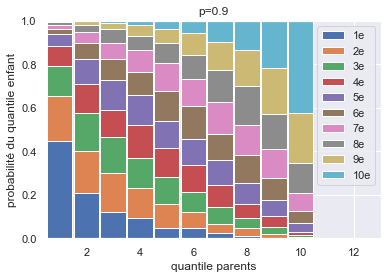

In [141]:
# Faible mobilité (pj=0.9)

plot_conditional_distributions(0.9, cd, nb_quantiles)

In [142]:
# Définition de nouveaux paramètres pour une forte mobilité

nb_quantiles = 10
n = 1000 * nb_quantiles
pj2 = 0.1

In [143]:
y_child2, y_parents2 = generate_incomes(n, pj2)
sample2 = compute_quantiles(y_child2, y_parents2, nb_quantiles)
cd2 = conditional_distributions(sample2, nb_quantiles)
cd2

[[0.126, 0.12, 0.116, 0.101, 0.107, 0.091, 0.073, 0.087, 0.101, 0.078],
 [0.13, 0.089, 0.108, 0.103, 0.109, 0.09, 0.096, 0.094, 0.094, 0.087],
 [0.091, 0.122, 0.118, 0.11, 0.085, 0.1, 0.109, 0.079, 0.088, 0.098],
 [0.103, 0.096, 0.095, 0.107, 0.109, 0.092, 0.116, 0.105, 0.101, 0.076],
 [0.116, 0.111, 0.106, 0.084, 0.105, 0.098, 0.094, 0.11, 0.087, 0.089],
 [0.092, 0.109, 0.089, 0.092, 0.105, 0.102, 0.107, 0.087, 0.099, 0.118],
 [0.088, 0.102, 0.086, 0.104, 0.096, 0.094, 0.107, 0.104, 0.098, 0.121],
 [0.091, 0.066, 0.094, 0.104, 0.092, 0.109, 0.103, 0.1, 0.122, 0.119],
 [0.093, 0.088, 0.106, 0.095, 0.097, 0.108, 0.098, 0.11, 0.101, 0.104],
 [0.07, 0.097, 0.082, 0.1, 0.095, 0.116, 0.097, 0.124, 0.109, 0.11]]

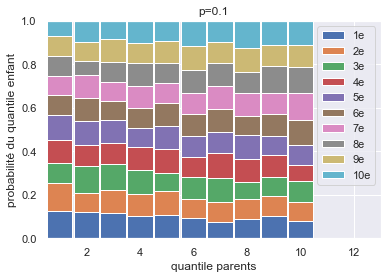

In [144]:
# Faible mobilité (pj=0.1)

plot_conditional_distributions(0.1, cd2, nb_quantiles)

In [145]:
# effacer les individus

del y_parents, y_child
del y_parents2, y_child2

### 3.3. Création de la nouvelle echantillon

In [146]:
subset_fin = fin.copy()

In [147]:
subset_fin = subset_fin[["Country Code","quantile","Gini","income","gdpppp","Coeff_elast"]]
subset_fin.head()

,Country Code,quantile,Gini,income,gdpppp,Coeff_elast
0,ALB,1,32.141019,728.89795,7297.0,0.465537
1,ALB,2,32.141019,916.66235,7297.0,0.465537
2,ALB,3,32.141019,1010.91600,7297.0,0.465537
3,ALB,4,32.141019,1086.90780,7297.0,0.465537
4,ALB,5,32.141019,1132.69970,7297.0,0.465537


In [148]:
subset_fin = subset_fin.rename(columns = {"Country Code" : "country_code", "quantile" : "c_i_child", "Coeff_elast" : "p_j", 
                                  "gdpppp" : "m_j", "Gini" : "G_j"})

In [149]:
# Laissons 3 premiers pays das notre dataframe pour travailler d'abord sur un petit echantillon 
subset = subset_fin.iloc[0:300]

In [150]:
df_500 = pd.concat([subset]*500, ignore_index=True)
df_500 = df_500.sort_values(["country_code","c_i_child"]).reset_index()
df_500 = df_500.drop(columns=["index"])

In [151]:
#Nous allons ajouter la colonne c_i_parents et l'initialiser à np.nan
df_500["c_i_parents"] = np.nan

In [152]:
#Calculs des distributions conditionnelles du jeu de données
country_income_pj = subset[["country_code","p_j"]]
country_income_pj = country_income_pj.groupby(by="country_code").mean().reset_index()

In [153]:
nb_quantiles = 100
n = nb_quantiles*500

In [154]:
liste_cd = {}
for i, row in enumerate(country_income_pj.iterrows()):
    y_child, y_parents = generate_incomes(n,row[1][1])
    sample_final = compute_quantiles(y_child, y_parents, nb_quantiles)
    cd = conditional_distributions(sample_final, nb_quantiles)
    liste_cd[row[1][0]] = cd

In [155]:
#Affectation des valeurs aux individus de l'échantillon
for i, code_pays in enumerate(subset["country_code"].drop_duplicates().values):
    for c_parents in np.arange(1,101, dtype="int8"):
        #recupération des distributions de la liste pour pays et parents
        dc = liste_cd[code_pays][c_parents-1]

        #calcul des valeurs en fonction de la distribution
        ci_parents = []
        for i in range(len(dc)):
            classe_parents = int(dc[i]*500)
            ci_parents.extend([i+1]*classe_parents)

        #affectation des valeurs aux individus de l'échantillon
        df_500.loc[(df_500["country_code"] == code_pays) 
                      & (df_500["c_i_child"] == c_parents), "c_i_parents"] = ci_parents

In [156]:
df_500

,country_code,c_i_child,G_j,income,m_j,p_j,c_i_parents
0,ALB,1,32.141019,728.89795,7297.0,0.465537,1.0
1,ALB,1,32.141019,728.89795,7297.0,0.465537,1.0
2,ALB,1,32.141019,728.89795,7297.0,0.465537,1.0
3,ALB,1,32.141019,728.89795,7297.0,0.465537,1.0
4,ALB,1,32.141019,728.89795,7297.0,0.465537,1.0
...,...,...,...,...,...,...,...
149995,ARM,100,28.030458,6566.15900,5611.0,0.465537,100.0
149996,ARM,100,28.030458,6566.15900,5611.0,0.465537,100.0
149997,ARM,100,28.030458,6566.15900,5611.0,0.465537,100.0
149998,ARM,100,28.030458,6566.15900,5611.0,0.465537,100.0


In [157]:
df_500[["country_code","c_i_child","c_i_parents","income"]].groupby(by=["country_code","c_i_child","c_i_parents"]).count().head(10)

income
country_code c_i_child c_i_parents        
ALB          1         1.0              36
                       2.0              31
                       3.0              26
                       4.0              22
                       5.0              16
                       6.0              14
                       7.0              16
                       8.0              15
                       9.0              18
                       10.0             14

In [158]:
# Ajoutons tous les pays

subset = subset_fin

In [159]:
df_500 = pd.concat([subset]*500, ignore_index=True)
df_500 = df_500.sort_values(["country_code","c_i_child"]).reset_index()
df_500 = df_500.drop(columns=["index"])
#Nous allons ajouter la colonne c_i_parents et l'initialiser à np.nan
df_500["c_i_parents"] = np.nan
#Calculs des distributions conditionnelles du jeu de données
country_income_pj = subset[["country_code","p_j"]]
country_income_pj = country_income_pj.groupby(by="country_code").mean().reset_index()
nb_quantiles = 100
n = nb_quantiles*500

In [160]:
liste_cd = {}
for i, row in enumerate(country_income_pj.iterrows()):
    y_child, y_parents = generate_incomes(n,row[1][1])
    sample_final = compute_quantiles(y_child, y_parents, nb_quantiles)
    cd = conditional_distributions(sample_final, nb_quantiles)
    liste_cd[row[1][0]] = cd

In [161]:
#Affectation des valeurs aux individus de l'échantillon
for i, code_pays in enumerate(subset["country_code"].drop_duplicates().values):
    for c_parents in np.arange(1,101, dtype="int8"):
        #recupération des distributions de la liste pour pays et parents
        dc = liste_cd[code_pays][c_parents-1]

        #calcul des valeurs en fonction de la distribution
        ci_parents = []
        for i in range(len(dc)):
            classe_parents = int(dc[i]*500)
            ci_parents.extend([i+1]*classe_parents)

        #affectation des valeurs aux individus de l'échantillon
        df_500.loc[(df_500["country_code"] == code_pays) 
                      & (df_500["c_i_child"] == c_parents), "c_i_parents"] = ci_parents

In [162]:
df_500

,country_code,c_i_child,G_j,income,m_j,p_j,c_i_parents
0,ALB,1,32.141019,728.89795,7297.0,0.465537,1.0
1,ALB,1,32.141019,728.89795,7297.0,0.465537,1.0
2,ALB,1,32.141019,728.89795,7297.0,0.465537,1.0
3,ALB,1,32.141019,728.89795,7297.0,0.465537,1.0
4,ALB,1,32.141019,728.89795,7297.0,0.465537,1.0
...,...,...,...,...,...,...,...
5799995,ZAF,100,68.294901,82408.55000,9602.0,0.655524,100.0
5799996,ZAF,100,68.294901,82408.55000,9602.0,0.655524,100.0
5799997,ZAF,100,68.294901,82408.55000,9602.0,0.655524,100.0
5799998,ZAF,100,68.294901,82408.55000,9602.0,0.655524,100.0


In [163]:
df_500[["country_code","c_i_child","c_i_parents","income"]].groupby(by=["country_code","c_i_child","c_i_parents"]).count().head(10)

income
country_code c_i_child c_i_parents        
ALB          1         1.0              53
                       2.0              35
                       3.0              24
                       4.0              17
                       5.0              21
                       6.0              19
                       7.0              13
                       8.0              12
                       9.0              13
                       10.0             10

In [164]:
df_500_fin = df_500.copy()

In [165]:
df_500_fin["c_i_parents"] = df_500_fin["c_i_parents"].astype(int)

In [166]:
del df_500_fin["c_i_child"]

In [167]:
df_500_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800000 entries, 0 to 5799999
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   country_code  object 
 1   G_j           float64
 2   income        float64
 3   m_j           float64
 4   p_j           float64
 5   c_i_parents   int32  
dtypes: float64(4), int32(1), object(1)
memory usage: 243.4+ MB


In [176]:
df_500_fin.to_csv('C:\\Users\\mfila\\df_500_fin.csv')